In [1]:
# Standard library imports
import os

# Third party library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
BLINDED_FILE_PATH = "../datasets/TASK_2/TASK_2/blinded_test_set.csv"
blinded_test_data = pd.read_csv(BLINDED_FILE_PATH)

<Axes: >

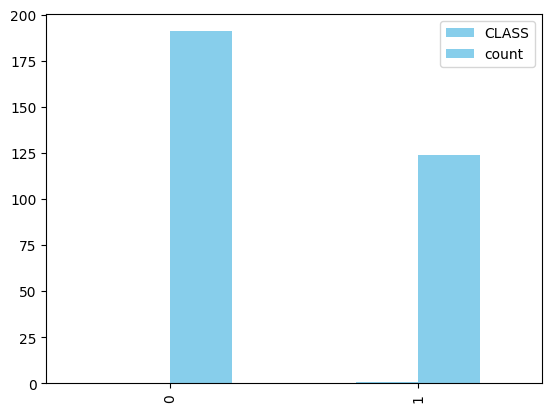

In [3]:
# Reading the csv file
FILE_PATH = "../datasets/TASK_2/TASK_2/train_set.csv"
train_data = pd.read_csv(FILE_PATH)
train_labels = train_data['CLASS'].value_counts().reset_index()
train_labels.plot(kind="bar", color="skyblue")

<Axes: xlabel='CLASS'>

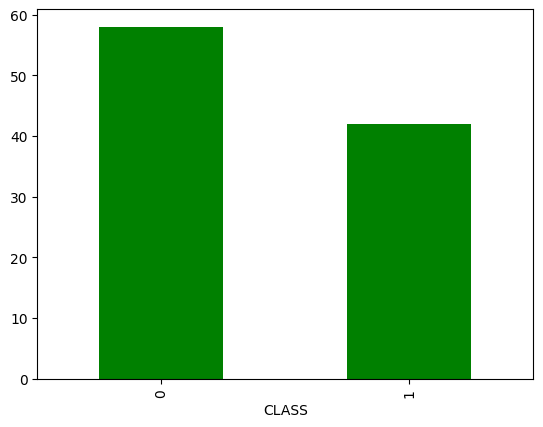

In [4]:
TEST_PATH = "../datasets/TASK_2/TASK_2/test_set.csv"
test_data = pd.read_csv(TEST_PATH)
test_labels = test_data['CLASS'].value_counts()
test_labels.plot(kind="bar", color="green")

In [5]:
X_test = test_data.drop(columns=["ID", "CLASS"])
y_test = test_data["CLASS"]

In [6]:
X_train = train_data.drop(columns=["ID", "CLASS"])
y_train = train_data["CLASS"]

<Axes: >

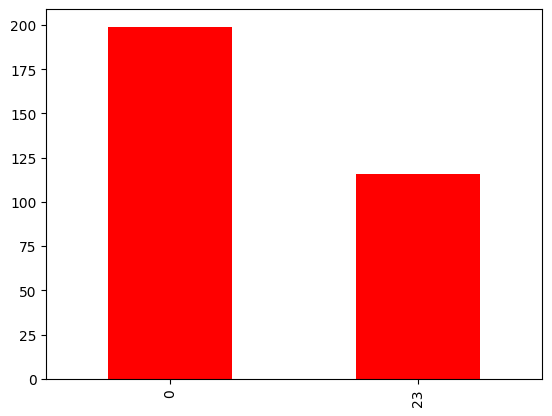

In [7]:
# Check for null values
missing_per_row = X_train.isna().sum(axis=1)
missing_per_row = missing_per_row.value_counts()
missing_per_row.plot(kind="bar", color="red")

<Axes: >

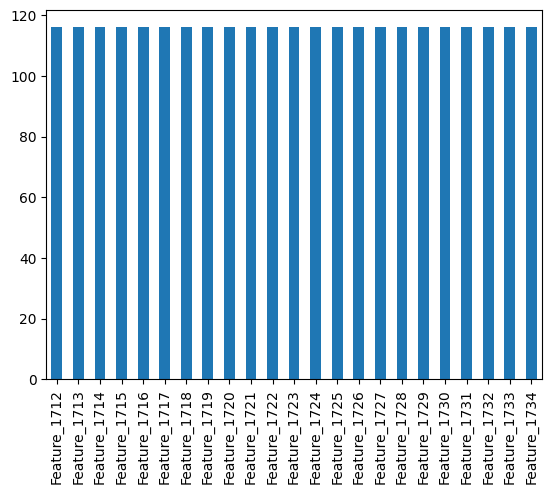

In [8]:
missing_per_column = X_train.isna().sum(axis=0)
missing_per_column = missing_per_column[missing_per_column > 0]
missing_per_column.plot(kind="bar")

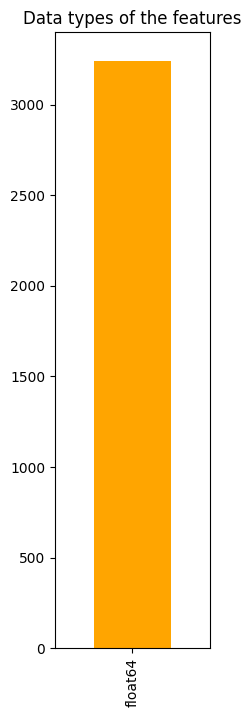

In [9]:
plt.figure(figsize=(2, 8))
feature_dtypes = X_train.dtypes.value_counts()
feature_dtypes.plot(kind="bar", color="orange")
plt.title("Data types of the features")
plt.show()

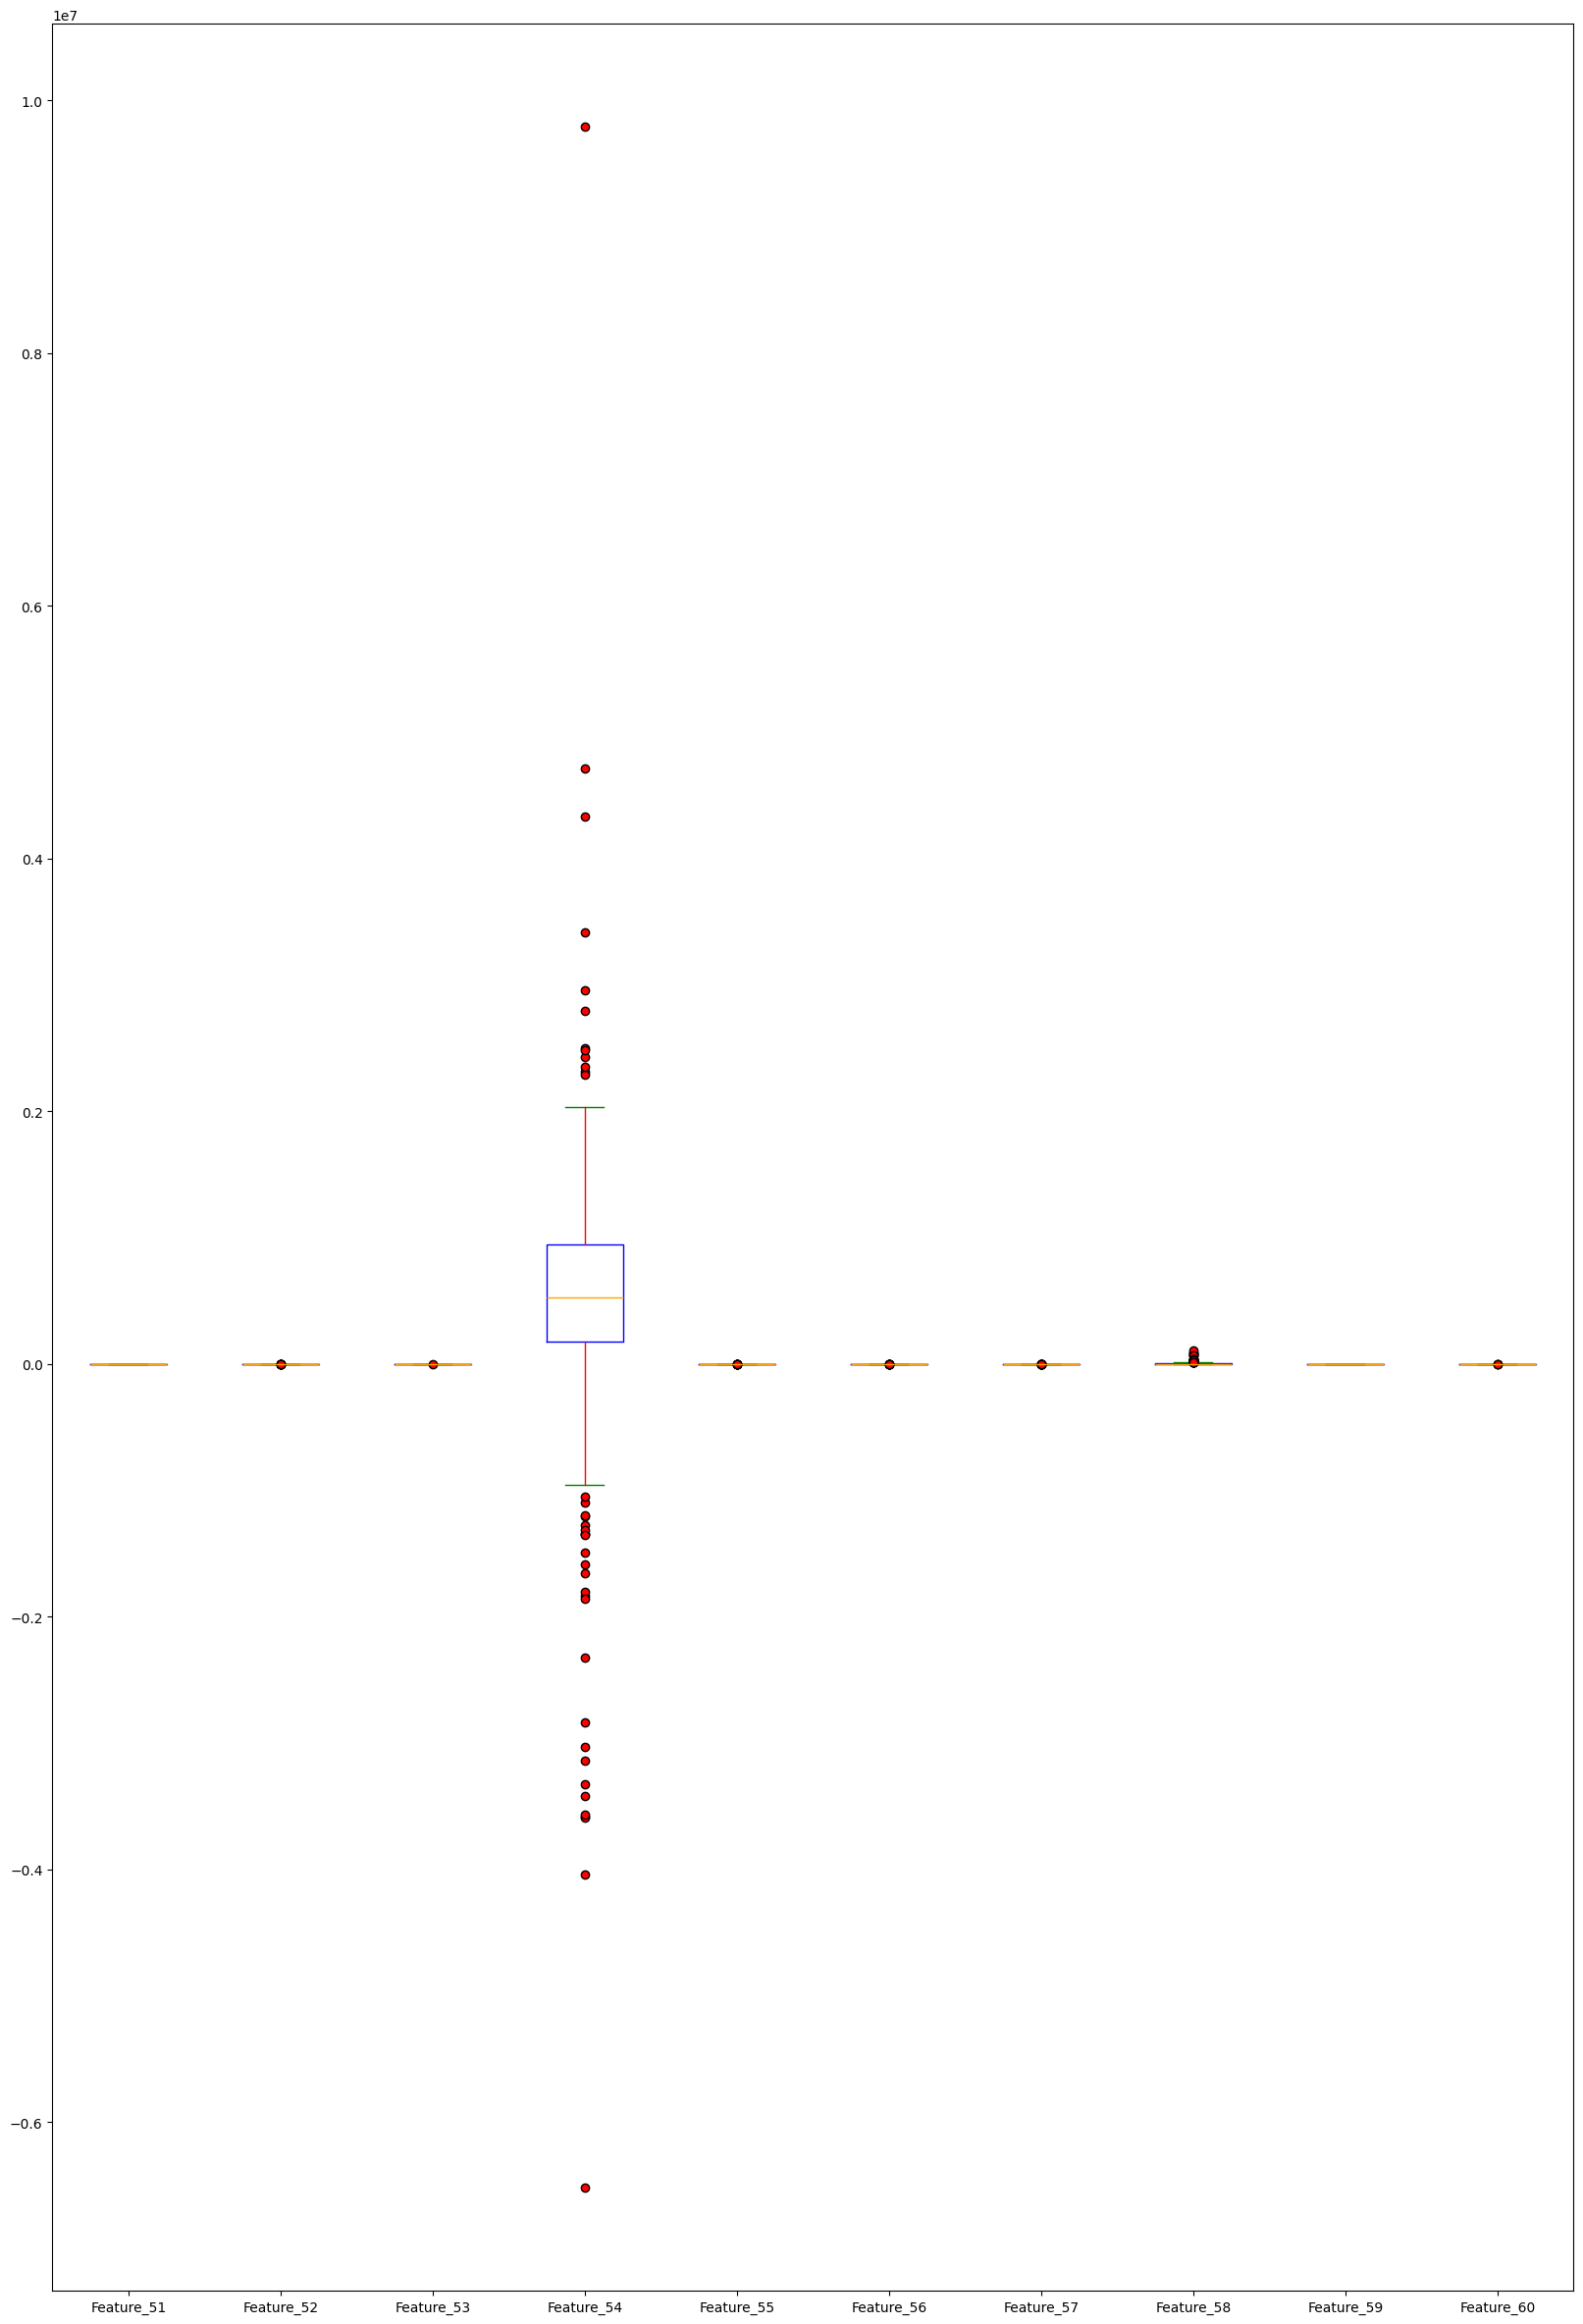

In [10]:
plt.figure(figsize=(20, 30))
plt.boxplot(X_train.iloc[:, 50:60], 
            positions=range(50, 60, 1), 
            tick_labels=X_train.iloc[:, 50:60].columns.to_list(),
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.show()

In [11]:
train_data.select_dtypes(include=['number']).columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Feature_3230', 'Feature_3231', 'Feature_3232', 'Feature_3233',
       'Feature_3234', 'Feature_3235', 'Feature_3236', 'Feature_3237',
       'Feature_3238', 'CLASS'],
      dtype='object', length=3239)

In [12]:
train_dist= train_data["CLASS"].value_counts(normalize=True)
test_dist = test_data["CLASS"].value_counts(normalize=True)
dist_diff = abs(train_dist - test_dist).sum()
if dist_diff > 0.1:
    print(f"Warning: There is a large distribution difference: {dist_diff:.3f}")
else:
    print(f"Distribution difference is acceptable: {dist_diff:.3f}")


Distribution difference is acceptable: 0.053


In [13]:
y_train.isna().sum()

np.int64(0)

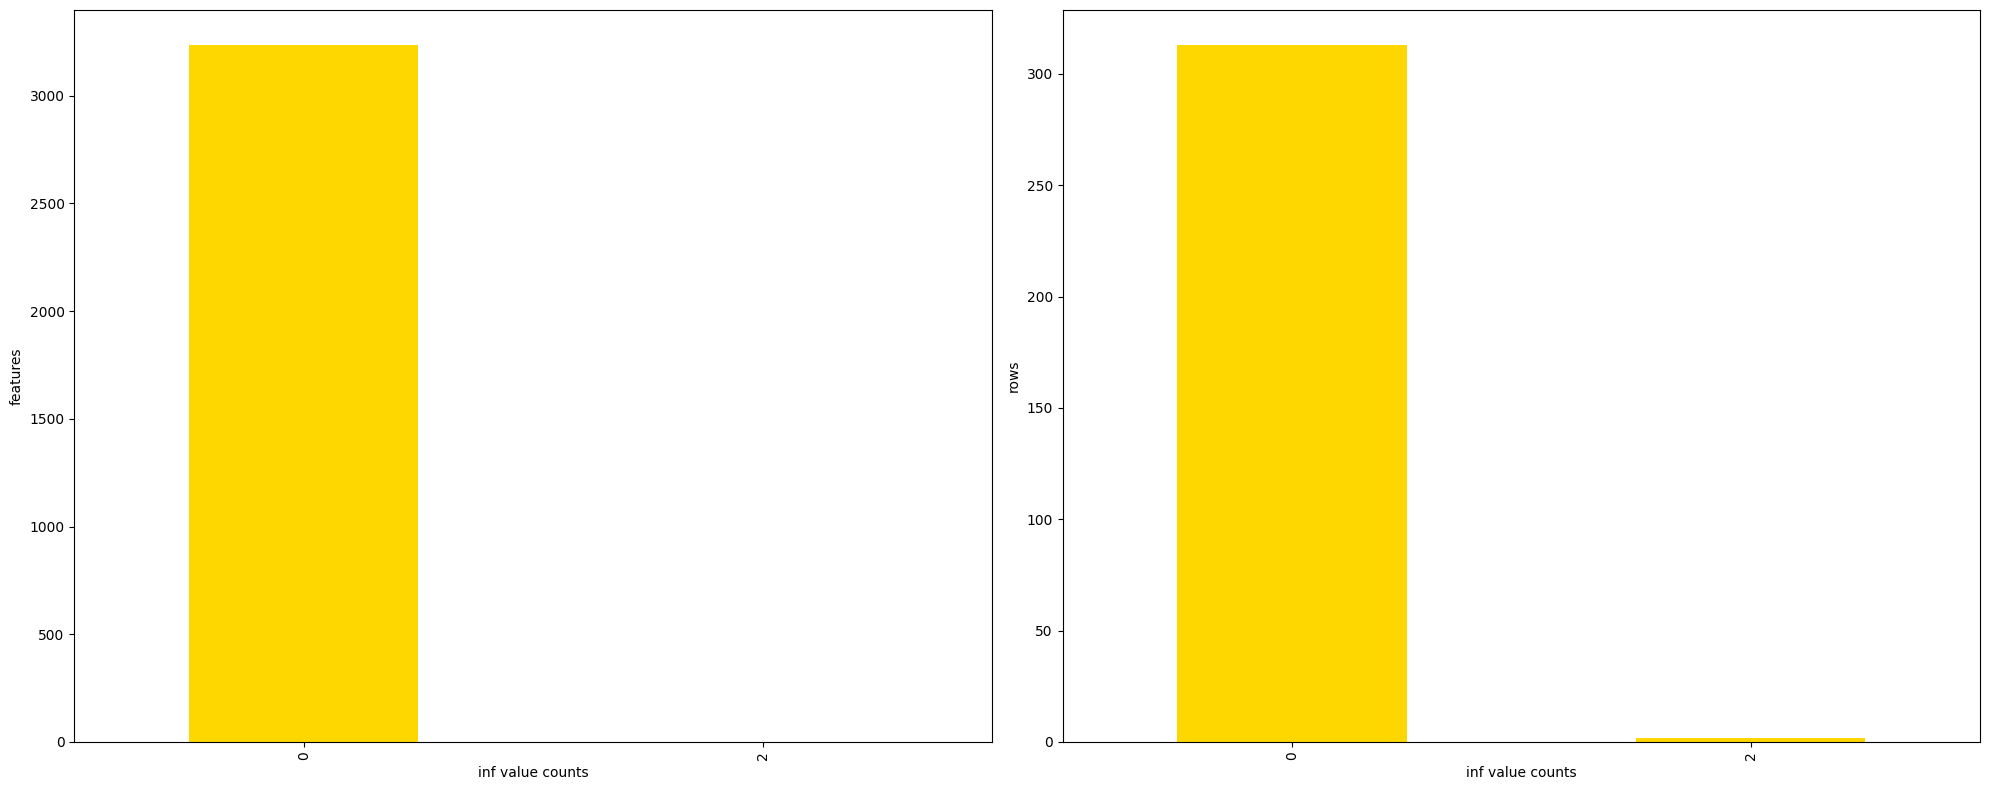

In [14]:
import numpy as np

# Count infinities

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

inf_per_feature = np.isinf(X_train).sum(axis=0).value_counts()
inf_per_feature.plot(kind="bar", color="gold", ax=ax[0])
ax[0].set_xlabel("inf value counts")
ax[0].set_ylabel("features")

inf_per_row = np.isinf(X_train).sum(axis=1).value_counts()
inf_per_row.plot(kind="bar", color="gold", ax=ax[1])
ax[1].set_xlabel("inf value counts")
ax[1].set_ylabel("rows")

plt.tight_layout()
plt.show()


<BarContainer object of 2 artists>

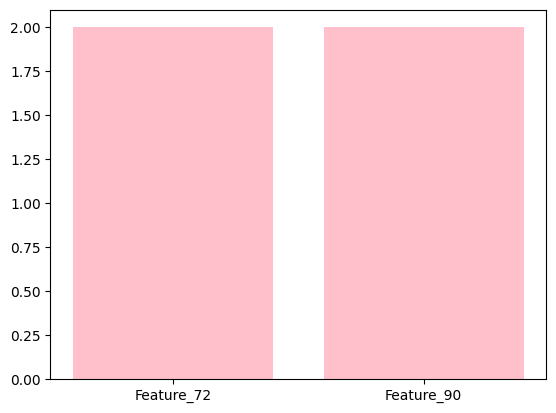

In [15]:
inf_mask = np.isinf(X_train)
inf_summary = inf_mask.sum(axis=0)
features = inf_summary[inf_summary > 0].index.to_list()
plt.bar(features, height=inf_summary[inf_summary > 0].values, color="pink")

In [16]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [17]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
X_imputed = simple_imputer.fit_transform(X_train)
Xt_imputed = simple_imputer.transform(X_test)

In [ ]:
# Detect Outliers
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

In [94]:
def impute_outliers(data):
    temp = data.copy()
    for column in temp.columns:
        outliers = detect_outliers_iqr(temp[column])
        median_value = temp.loc[np.logical_not(outliers.to_list()), column].median()
        temp.loc[outliers.to_list(), column] = median_value
    return temp

X_imputed = pd.DataFrame(X_imputed, columns=X_train.columns)
X_clean = impute_outliers(X_imputed)
Xt_imputed = pd.DataFrame(Xt_imputed, columns=X_test.columns)
Xt_clean = impute_outliers(Xt_imputed)

In [107]:
def clip_outliers(data, lower_percentile=5, upper_percentile=95):
    temp = data.copy()
    for column in temp.columns:
        lower_limit = np.percentile(data[column], lower_percentile)
        upper_limit = np.percentile(data[column], upper_percentile)
        temp.loc[column] = np.clip(data[column], lower_limit, upper_limit)
        return temp

X_clipped = clip_outliers(X_clean)

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_feature(data):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.scatterplot(data, ax=axes[0])
    axes[0].set_title("Original feature")
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title("Box plot")

    plt.tight_layout(pad=0.5)
    plt.show()


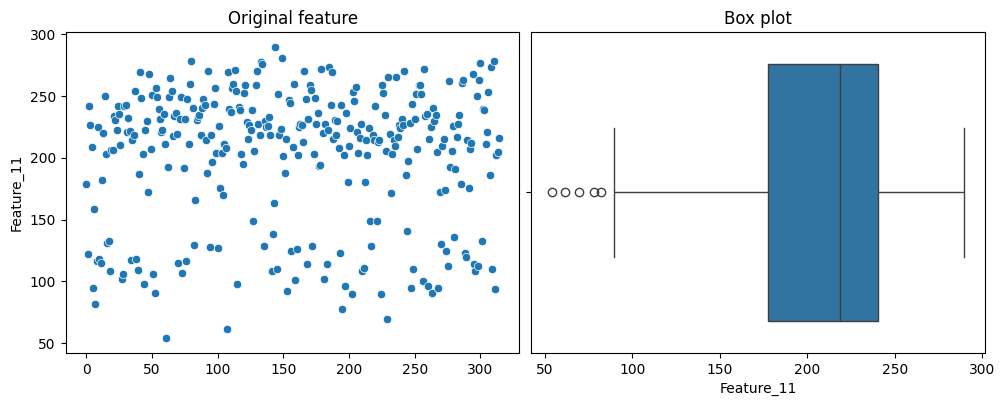

In [110]:
visualize_feature(X_imputed["Feature_11"])

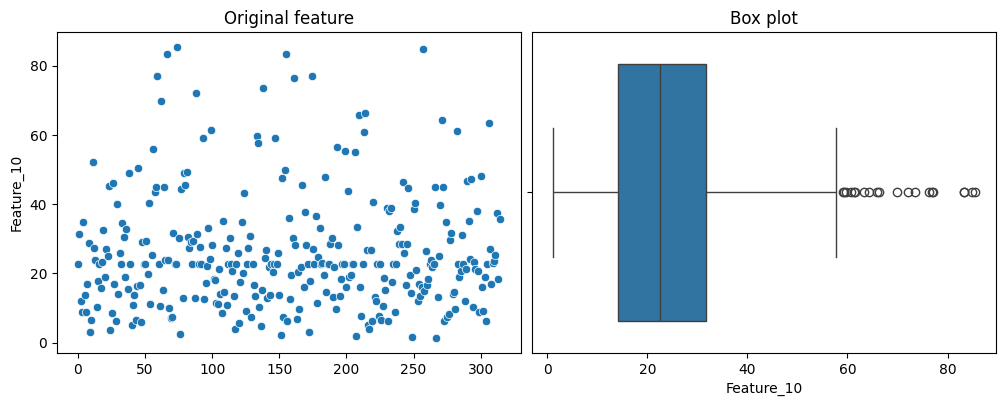

In [111]:
visualize_feature(X_clean["Feature_10"])

In [73]:
from scipy.stats import yeojohnson

def power_transform(data):
    temp = data.copy()
    for column in temp.columns:
        transformed_col, _ = yeojohnson(temp[column].to_numpy())
        temp[column] = transformed_col
    return temp

X_yeojohnson = power_transform(X_clean)
Xt_yeojohnson = power_transform(Xt_clean)

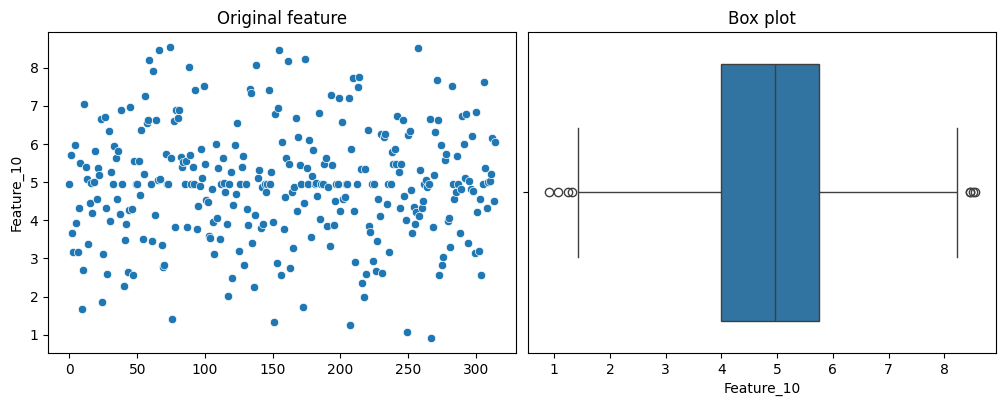

In [78]:
visualize_feature(X_yeojohnson["Feature_10"])

In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

smt = SMOTE(random_state=42)
X_sampled, y_sampled = smt.fit_resample(X_yeojohnson, y_train)

counter = Counter(y_sampled)
print('After', counter)


Before Counter({0: 191, 1: 124})
After Counter({0: 191, 1: 191})


In [80]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()
X_scaled = scalar.fit_transform(X_sampled)
Xt_scaled = scalar.transform(Xt_yeojohnson)

In [81]:
# scalar.data_max_, scalar.data_min_

In [82]:
# scalar.mean_, scalar.var_

In [83]:
X_new = pd.DataFrame(X_scaled, columns=X_sampled.columns)
Xt_new = pd.DataFrame(Xt_scaled, columns=Xt_yeojohnson.columns)

(array([ 2.,  3., 14., 38., 53., 98., 89., 49., 23., 13.]),
 array([-2.62007983, -2.16742725, -1.71477467, -1.2621221 , -0.80946952,
        -0.35681694,  0.09583564,  0.54848822,  1.00114079,  1.45379337,
         1.90644595]),
 <BarContainer object of 10 artists>)

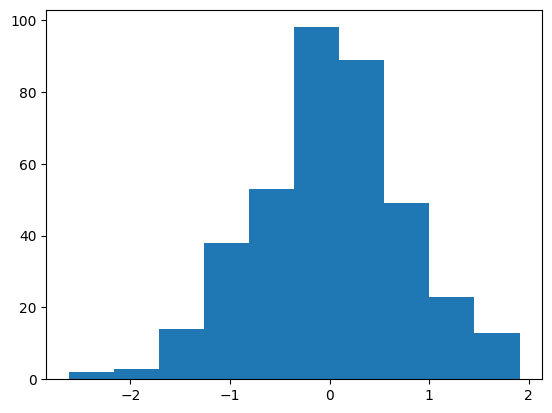

In [84]:
plt.hist(X_new["Feature_4"])

C:\Users\ameer\AppData\Local\Temp\ipykernel_5592\1264782315.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_new.iloc[:, 0:10],


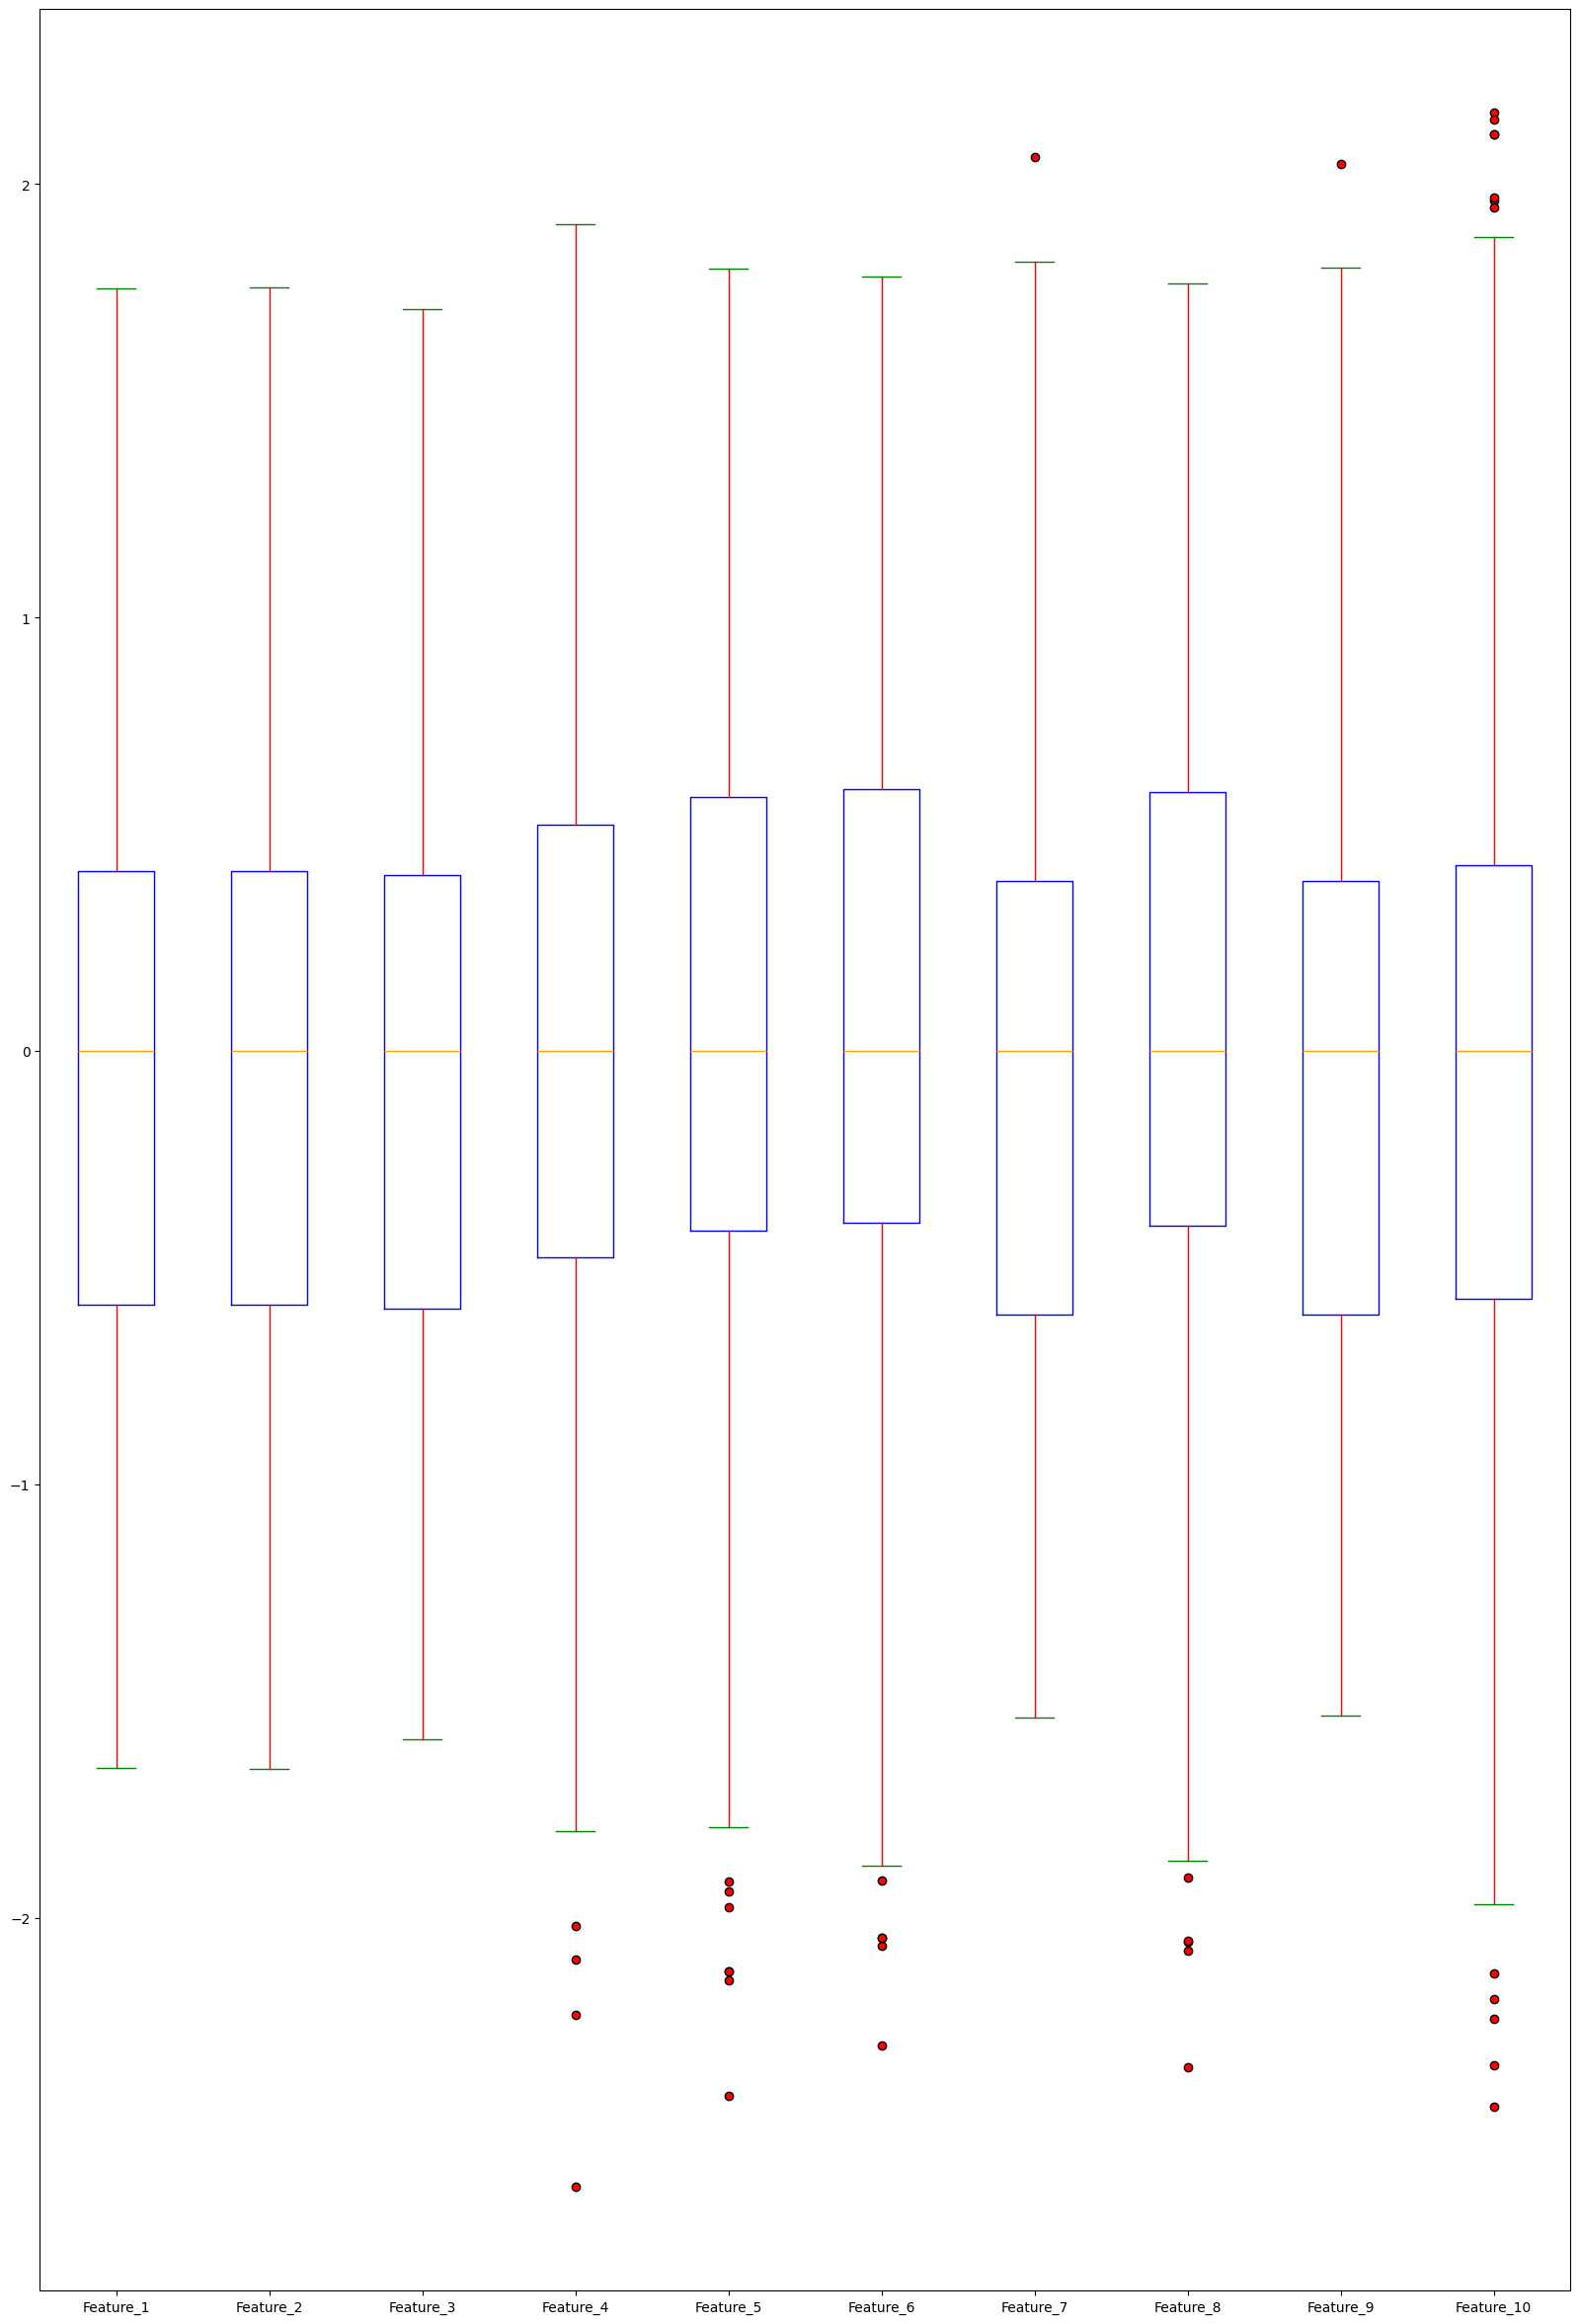

In [87]:
plt.figure(figsize=(20, 30))
plt.boxplot(X_new.iloc[:, 0:10], 
            positions=range(0, 10, 1), 
            labels=X_new.iloc[:, 0:10].columns.to_list(),
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.show()

In [32]:
feature_columns = X_new.columns

In [33]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X_new)
Xt_var = selector.transform(Xt_new)


print(f"Reduced from {X_new.shape[1]} to {X_var.shape[1]} features")

selected_mask = selector.get_support()

selected_features = [feature_columns[i] for i in range(len(selected_mask)) if selected_mask[i]]

Reduced from 3238 to 3057 features


In [34]:
X_var = pd.DataFrame(X_var, columns=selected_features)
Xt_var = pd.DataFrame(Xt_var, columns=selected_features)

In [35]:
corr_matrix = X_var.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_uncorrelated = X_var.drop(columns=to_drop, axis=1)

In [36]:
uncorrelated_columns = X_uncorrelated.columns

In [37]:
Xt_uncorrelated = Xt_var.drop(columns=to_drop, axis=1)
Xt_uncorrelated

,Feature_1,Feature_3,Feature_4,Feature_5,Feature_7,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,...,Feature_3214,Feature_3218,Feature_3220,Feature_3221,Feature_3222,Feature_3223,Feature_3233,Feature_3234,Feature_3236,Feature_3237
0,45.173838,51063.792196,-2.510832,64.826472,-3.916540,1.243912,-4.939737,-4.086503,3.579133,-2.783610,...,-1.290504e+06,0.286857,150350.174841,-58.310779,-1.236556,-8.326874,0.689609,3.221411,3.635139e+07,-6.048701
1,20.708493,51063.792196,-2.461940,64.826472,-3.916540,-0.247000,-4.939737,-4.086503,3.579133,-2.923412,...,-1.290505e+06,1.076392,153139.630552,-58.310779,1.676559,-8.304307,1.453567,4.141413,3.574654e+07,-6.048706
2,45.150090,51973.154188,-2.529487,58.169712,-3.905031,1.243912,-4.939737,-4.086503,2.327076,-2.755530,...,-1.290504e+06,1.193573,149379.854853,-58.302922,1.476148,-8.459659,3.539674,5.310869,3.594409e+07,-6.048747
3,64.998752,74630.478213,-3.285286,65.379442,-3.917097,-0.664749,-4.939737,-4.086100,3.807956,-2.783610,...,-1.290504e+06,2.543659,126768.964354,-58.321591,3.307054,-8.838892,5.546443,7.590844,3.549878e+07,-6.048779
4,49.201779,39731.650509,-3.429519,64.826472,-3.938663,-0.306371,-4.939738,-4.086765,0.415224,-2.654701,...,-1.290504e+06,3.189227,130644.205546,-58.324288,4.098212,-8.880120,5.138367,9.376173,3.572516e+07,-6.048796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56.799307,68791.754851,-2.893391,59.642735,-3.907636,1.757371,-4.939738,-4.086820,0.735526,-2.684384,...,-1.290504e+06,1.738512,145424.975954,-58.313974,2.385900,-8.506223,4.472576,5.605020,3.574654e+07,-6.048729
96,66.856640,64493.159271,-3.706798,76.589609,-3.932932,1.364654,-4.939738,-4.086703,1.588918,-2.692761,...,-1.290504e+06,3.340274,138519.069062,-58.322433,4.287382,-8.942853,6.630409,5.206862,3.568710e+07,-6.048808
97,61.346969,84468.004414,-2.791778,54.062893,-3.897347,1.716862,-4.939737,-4.086503,3.805513,-2.824749,...,-1.290504e+06,1.101248,128368.366590,-58.291715,-0.644122,-8.638165,4.412137,4.656966,3.528871e+07,-6.048738
98,35.703731,30748.717195,-2.649330,70.641802,-3.924925,0.454327,-4.939737,-4.086287,3.579133,-2.783610,...,-1.290505e+06,2.595509,132239.096214,-58.324418,3.368779,-8.618804,3.678919,7.727442,3.581637e+07,-6.048797


In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model = SelectFromModel(clf_rf)
model.fit(X_uncorrelated, y_sampled)
X_final = model.transform(X_uncorrelated)
print(X_final.shape)
Xt_final = model.transform(Xt_uncorrelated)
print(Xt_final.shape)

selected_mask = model.get_support()
selected_rfe_features = [uncorrelated_columns[i] for i in range(len(selected_mask)) if selected_mask[i]]

(382, 611)
(100, 611)


In [39]:
X_final = pd.DataFrame(X_final, columns=selected_rfe_features)
Xt_final = pd.DataFrame(Xt_final, columns=selected_rfe_features)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


clf_rf = RandomForestClassifier(n_estimators=400)
clf_rf.fit(X_final, y_sampled)

y_pred_rf = clf_rf.predict(Xt_final)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[47 11]
 [31 11]]
              precision    recall  f1-score   support

           0       0.60      0.81      0.69        58
           1       0.50      0.26      0.34        42

    accuracy                           0.58       100
   macro avg       0.55      0.54      0.52       100
weighted avg       0.56      0.58      0.55       100



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models_config = {

    'Logistic Regression': {

        'model': LogisticRegression(random_state=42, max_iter=2000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },

    'Random Forest': {

        'model': RandomForestClassifier(random_state=42, n_estimators=100),
        'params':{
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': ['sqrt', 'log2']
        }
    },

    'Decision Tree': {

        'model': DecisionTreeClassifier(random_state=42),

        'params':  {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': [5, 10, 20, 30],
            'min_samples_split': [2, 4, 8, 10],
            'min_samples_leaf': [1, 2, 3, 4],
            'max_features': [None, 'sqrt', 'log2'],
        }

    }

}

In [51]:
models_config

{'Logistic Regression': {'model': LogisticRegression(max_iter=2000, random_state=42),
  'params': {'C': [0.01, 0.1, 1, 10, 100],
   'penalty': ['l1', 'l2'],
   'solver': ['liblinear', 'saga']}},
 'Random Forest': {'model': RandomForestClassifier(random_state=42),
  'params': {'n_estimators': [100, 200, 300],
   'max_depth': [None, 5, 10, 20],
   'min_samples_split': [2, 5, 10, 20],
   'min_samples_leaf': [1, 2, 4, 8],
   'max_features': ['sqrt', 'log2']}},
 'Decision Tree': {'model': DecisionTreeClassifier(random_state=42),
  'params': {'criterion': ['gini', 'entropy', 'log_loss'],
   'max_depth': [5, 10, 20, 30],
   'min_samples_split': [2, 4, 8, 10],
   'min_samples_leaf': [1, 2, 3, 4],
   'max_features': [None, 'sqrt', 'log2']}}}

In [53]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = dict()

for name, config in models_config.items():

    print(f"Training {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=cv, n_jobs=-1, scoring='f1', verbose=0)
    grid_search.fit(X_final, y_sampled)
    models[name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'cv_score': grid_search.best_score_
        }   

    if name in models: 
        print(f"Best CV Score: {models[name]["cv_score"]:.4f}")
        print(f"Best Parameters: {models[name]["best_params"]}")

Training Logistic Regression...


Best CV Score: 0.7132
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Training Random Forest...
Best CV Score: 0.7143
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Decision Tree...
Best CV Score: 0.6819
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

results = {}

for name, model_info in models.items():
    model = model_info['model']

    y_pred = model.predict(Xt_final)
    y_pred_proba = model.predict_proba(Xt_final)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {

        'accuracy': accuracy,
        'cv_score': model_info['cv_score'],
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"\n{name}:")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"CV Score: {model_info['cv_score']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    



Logistic Regression:
Test Accuracy: 0.5800
CV Score: 0.7132

Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        58
           1       0.00      0.00      0.00        42

    accuracy                           0.58       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.34      0.58      0.43       100


Random Forest:
Test Accuracy: 0.5100
CV Score: 0.7143

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.21      0.33        58
           1       0.46      0.93      0.61        42

    accuracy                           0.51       100
   macro avg       0.63      0.57      0.47       100
weighted avg       0.66      0.51      0.45       100


Decision Tree:
Test Accuracy: 0.5700
CV Score: 0.6819

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63     

d:\classifier-algorithms\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\classifier-algorithms\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\classifier-algorithms\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter=1000, C= 1, penalty='l2', solver='liblinear')
clf_lr.fit(X_final, y_sampled)

y_pred_lr = clf_lr.predict(Xt_final)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[58  0]
 [42  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        58
           1       0.00      0.00      0.00        42

    accuracy                           0.58       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.34      0.58      0.43       100



d:\classifier-algorithms\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\classifier-algorithms\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\classifier-algorithms\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_final, y_sampled)

y_pred_dt = clf_dt.predict(Xt_final)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


[[29 29]
 [22 20]]
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        58
           1       0.41      0.48      0.44        42

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.50      0.49      0.49       100



In [ ]:
# Check feature distributions

feature_drift_count = 0

for col in selected_k_features:
    train_mean = X_kbest_df[col].mean()
    test_mean = X_test[col].mean()
    train_std = X_kbest_df[col].std()

    if train_std > 0:
        z_score = (train_mean - test_mean) / train_std
        if z_score > 2:
            feature_drift_count += 1

if feature_drift_count > len(selected_k_features) * 0.2:
    print(f"Warning: {feature_drift_count} features show significant distribution drift")
else:
    print(f"Feature distributions look stable ({feature_drift_count} potential drift)")

KeyError: 'Feature_2'

In [36]:
# Check for overfitting

for name, model_info in models.items():
    model = model_info['model']
    train_pred = model.predict(X_kbest_df)
    train_acc = accuracy_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)

    overfitting = abs(train_acc - test_acc)
    print(f"{name}: Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}, Overfitting: {overfitting:.3f}")

    if overfitting > 0.1:
        print(f"Potential overfitting detected for {name} model")

Logistic Regression: Train Accuracy: 0.654, Test Accuracy: 0.610, Overfitting: 0.044
Random Forest: Train Accuracy: 1.000, Test Accuracy: 0.560, Overfitting: 0.440
Potential overfitting detected for Random Forest model
SVM: Train Accuracy: 0.698, Test Accuracy: 0.620, Overfitting: 0.078


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_kbest_df, y_train, cv=kf, scoring="accuracy")